# Урок 7. Классификация с помощью kNN. Кластеризация K-means

(*) Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

Вначале сгенерируем три облака точек с помощью инструментов `sklearn`.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

In [3]:
X, y = make_blobs(n_samples=100, random_state=1)

Изобразим точки на графике.

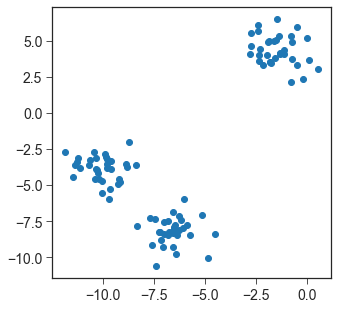

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1]);

В качестве метрики расстояния будем использовать евклидово расстояние, функция для которого была написана ранее. В качестве центроидов выберем первые k элементов датасета. Реализуем основной цикл алгоритма.

In [5]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [6]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return centroids, classes

Напишем функцию для визуализации кластеров

In [7]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(5,5))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

Проверим результат алгоритма после одной итерации

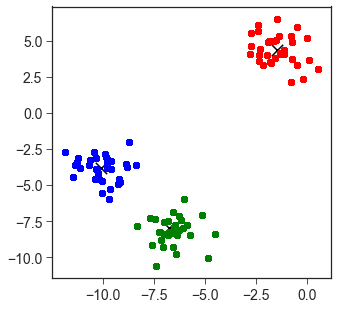

In [8]:
# определим максимальное количество итераций
max_iterations = 10
# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4
# сразу определим известное нам количество кластеров
k = 3
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [9]:
## функция качества - среднее квадратичное расстояние внутри каждого кластера, просуммированное по всем кластерам
def quality(centroids, clusters):
    quality_list = []
    k = len(clusters)
    for i in range(k):
        quality = 0
        for n in range(len(clusters[i])):
            distances = e_metrics(clusters[i][n], centroids[i])
            quality += distances ** 2
        quality_list.append(quality / len(clusters[i]))
    return np.sum(quality_list)

In [10]:
max_iterations = 1
centroids, clusters = kmeans(X, k, max_iterations, min_distance)
quality(centroids, clusters)

9.717315357132936

Построим зависимость среднего квадратичного расстояния внутри каждого кластера от количества итераций.

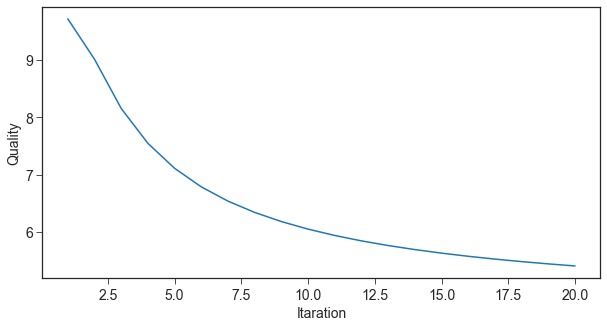

In [11]:
max_iterations = 20
quality_list = []

plt.figure(figsize=(10,5))
for i in range(1, max_iterations + 1):
    centroids, clusters = kmeans(X, k, i, min_distance)
    q = quality(centroids, clusters)
    quality_list.append(np.sum(q))
# print(quality_list)
plt.plot(range(1, max_iterations + 1), quality_list)
plt.xlabel('Itaration')
plt.ylabel('Quality');

Построим график зависимости среднего квадратичного расстояния внутри каждого кластера от количества кластеров.

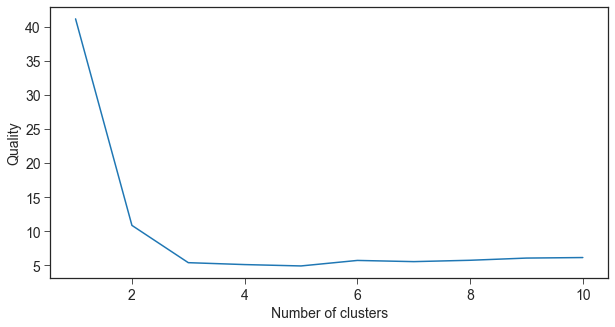

In [12]:
max_iterations = 20
quality_list = []

plt.figure(figsize=(10,5))
for k in range(1, 11):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    q = quality(centroids, clusters)
    quality_list.append(np.sum(q))
# print(quality_list)
plt.plot(range(1, 11), quality_list)
plt.xlabel('Number of clusters')
plt.ylabel('Quality');

График имеет минимум в точке k=5

In [13]:
np.argmin(quality_list) + 1

5